# Computing eigenfaces with PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gallery_probes_generator import GalleryProbesGenerator

In [2]:
data_generator = GalleryProbesGenerator(path_to_dataset='data/dataset1/', probes_length=200)
gallery_names, gallery_pictures = data_generator.get_gallery()

## Computing the mean face

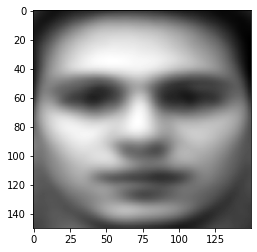

In [3]:
linear_pictures = np.array([picture.flatten() for person in gallery_pictures for picture in person])
meanPoint = linear_pictures.mean(axis = 0)
mean_face = plt.imshow(np.reshape(meanPoint, (-1, 150)), cmap="gray")
plt.show()

# subtract mean face to every picture
linear_pictures_centered = linear_pictures - meanPoint

In [4]:
from sklearn.decomposition import PCA

training_data = np.transpose(linear_pictures_centered)
components = 500

pca = PCA(n_components = components).fit(training_data)

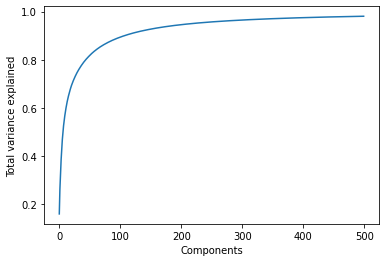

Variance explained with 500 components : 0.9807225525948765


In [5]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Components")
plt.ylabel("Total variance explained")
plt.show()

print(f"Variance explained with {components} components : {sum(pca.explained_variance_ratio_)}")

In [6]:
def normalize(v):
       norm = np.linalg.norm(v)
       if norm == 0:
          return v
       return v / norm

print('Computing eigenfaces...')
eigen_faces = list()
for vect in pca.components_:
    eigen_faces.append(normalize(np.dot(np.transpose(linear_pictures_centered), vect)))

eigen_faces = np.array(eigen_faces)

Computing eigenfaces...


## Showing the 100 first eigenfaces

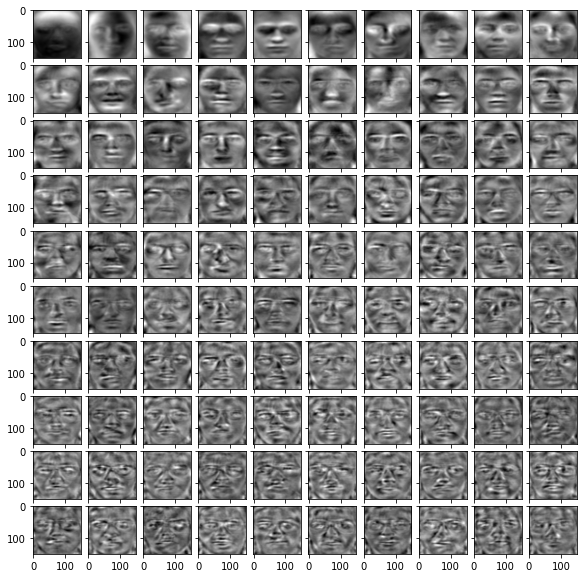

In [7]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(10, 10),
                 axes_pad=0.1,  # pad between axes in inch.
                 )
for ax, face in zip(grid, eigen_faces):
    # Iterating over the grid returns the Axes.
    ax.imshow(np.reshape(face, (-1, 150)), cmap="gray")

plt.show()

## Comparing face construction using different amount of eigenfaces.

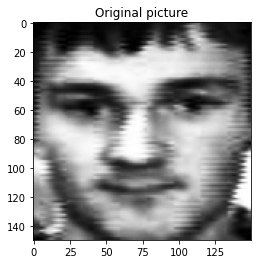

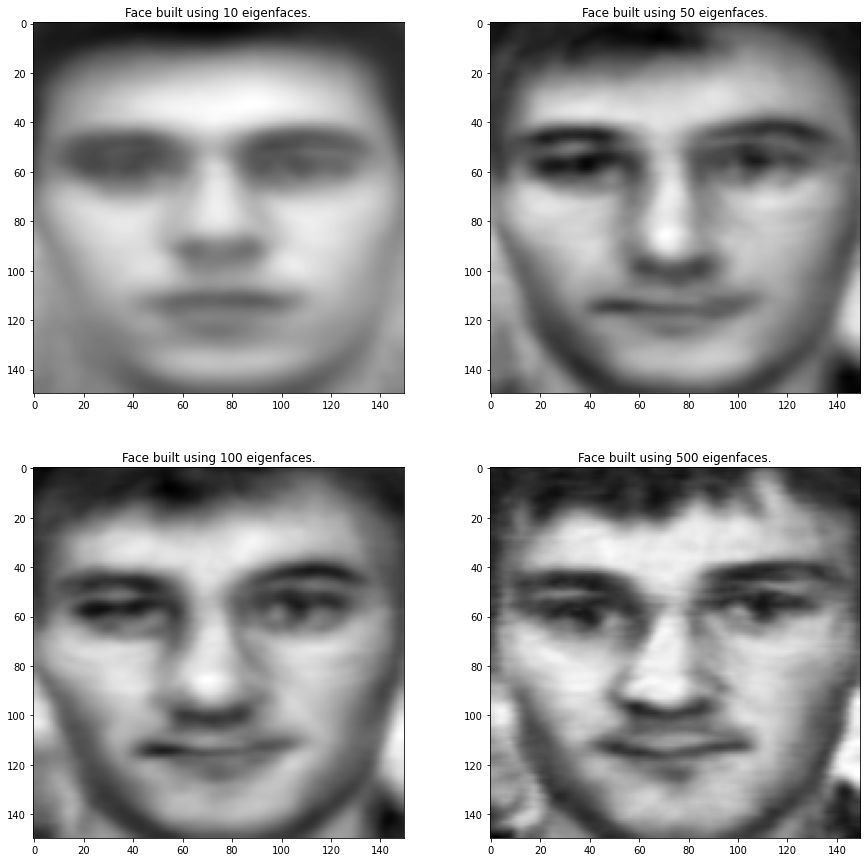

In [8]:
random_picture = linear_pictures_centered[105]
original_pic = plt.imshow(np.reshape(linear_pictures[105], (-1, 150)), cmap="gray")
plt.title("Original picture")
plt.show()

coefficients = np.dot(random_picture, np.transpose(eigen_faces))
eigen_faces_used = [10, 50, 100, 500]

reconstructed_pic = list()

for max_eigen in eigen_faces_used:
    reconstructed_pic.append(meanPoint + np.dot(coefficients[:max_eigen], eigen_faces[:max_eigen]))

fig, axes = plt.subplots(2, 2, figsize=(15,15))
for j in range(2):
    for i in range(2):
        if i == 0 and j == 0 :
            title = f'Face built using {eigen_faces_used[0]} eigenfaces.'
            index = 0
        elif i==1 and j == 0 :
            title = f'Face built using {eigen_faces_used[1]} eigenfaces.'
            index = 1
        elif i==0 and j == 1 :
            title = f'Face built using {eigen_faces_used[2]} eigenfaces.'
            index = 2
        else :
            title = f'Face built using {eigen_faces_used[3]} eigenfaces.'
            index = 3
        axes[j][i].imshow(np.reshape(reconstructed_pic[index], (-1, 150)), cmap="gray")
        axes[j][i].set_title(title)

## This code bellow can compute the eigenfaces without the PCA from the sklearn package

In [9]:
# print('cov_d_transpose')
# cov_d_transpose = (1/linear_pictures_centered.shape[1]-1) * np.dot(linear_pictures_centered, np.transpose(linear_pictures_centered))
# print(cov_d_transpose.shape)
# 
# print('val et vec propre')
# val_propres, vect_propres = np.linalg.eig(cov_d_transpose)
# 
# def normalize(v):
#        norm = np.linalg.norm(v)
#        if norm == 0:
#           return v
#        return v / norm
# 
# print('calcul des wi')
# w = list()
# for vect in vect_propres:
#     w.append(normalize(np.dot(np.transpose(linear_pictures_centered), vect)))
# 
# w = np.array(w)